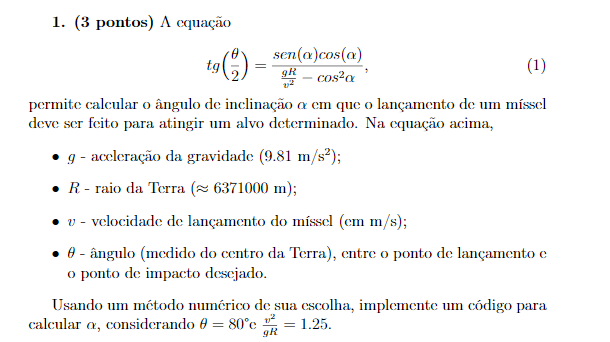

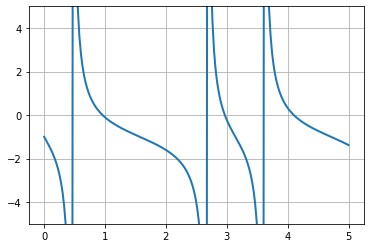

Iteração 1
x=  0.975 fx=  -0.042488075434353845 b-a 0.050000000000000044
Iteração 2
x=  0.9875 fx=  -0.07437012298158385 b-a 0.025000000000000022
Iteração 3
x=  0.99375 fx=  -0.08989346431919298 b-a 0.012499999999999956
Iteração 4
x=  0.996875 fx=  -0.0975550684612545 b-a 0.006249999999999978
Iteração 5
x=  0.9984375 fx=  -0.1013613749078841 b-a 0.0031250000000000444
Iteração 6
x=  0.99921875 fx=  -0.10325846796343574 b-a 0.0015625000000000222
Iteração 7
x=  0.999609375 fx=  -0.10420550733179956 b-a 0.0007812499999999556
Iteração 8
x=  0.9998046875 fx=  -0.10467865120620679 b-a 0.0003906249999999778
Iteração 9
x=  0.99990234375 fx=  -0.10491512931315128 b-a 0.0001953125000000444
Iteração 10
x=  0.999951171875 fx=  -0.10503334492431171 b-a 9.76562500000222e-05
Iteração 11
x=  0.9999755859375 fx=  -0.10509244687121844 b-a 4.882812499995559e-05
Iteração 12
x=  0.99998779296875 fx=  -0.10512199638024233 b-a 2.4414062499977796e-05
Iteração 13
x=  0.999993896484375 fx=  -0.10513677076867645 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Plotando o gráfico para saber para que valor de alpha, a função se aproxima de zero.
theta = np.linspace(0, 5, 200)
div = ((np.sin(theta)*np.cos(theta))/ (0.8 - (np.cos(theta)*np.cos(theta))))
y = div - np.tan(np.radians(45))
plt.ylim(-5,5)
plt.plot(theta, y, lw=2)
plt.grid()
plt.show()
# Tem raízes entre 0.9 ,1


# Valores iniciais
a = 0.9 # Valores de a e b próximos a primeira raíz segundo o gráfico.
b = 1
x0 = (b + a) / 2
eps = 10 ** (-6)


# Algoritmo
def f(theta):  # Definindo a função
    div = ((np.sin(theta) * np.cos(theta)) / (0.8 - (np.cos(theta)**2)))
    y = div - np.tan(np.radians(45))
    return y


# Iniciando o algoritmo da bissecção
it = 0
x = x0
while np.abs(b - a) > eps:
    it = it + 1

    if f(x) > 1:
        b = x
        x = (a + b) / 2

    if f(x) < 1:
        a = x
        x = (a + b) / 2

    print('Iteração', it)
    print('x= ', x, 'fx= ', f(x), 'b-a', np.abs(b - a))


# O valor da inclinação alpha equivale à 0.9
# para que o míssel atinja o alvo.

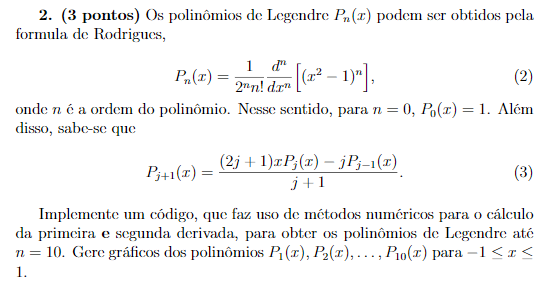

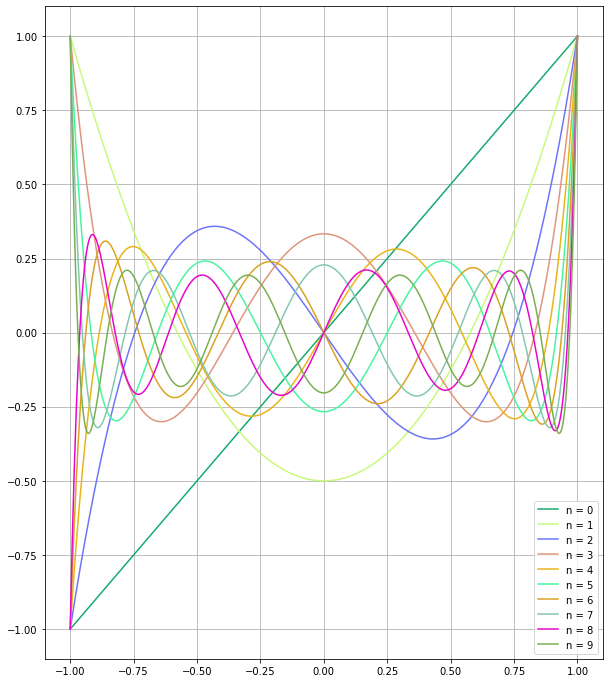

In [2]:
import random


def funcao(x, n):
    return pow((pow(x, 2) - 1), n)

def p_derivada(x, hs, n):
    cd = ((1/(2*hs)) * (funcao(x+hs, n) - funcao(x-hs, n)))/2        # n = 1  central difference
    return cd

def s_derivada(x, hs, n):
    fl_2 = ((1/(hs**2))*(funcao(x-hs, n) - 2*funcao(x, n) + funcao(x+hs, n)))/8     # n = 2
    return fl_2


def pj(x, hs, n):
    pj = [0]*n
    # Primeira e segunda derivada
    pj[0] = p_derivada(x, hs, 1)
    pj[1] = s_derivada(x, hs, 2)
    # Resto dos termos
    for i in range(2, n, 1):
        j = i - 1
        pj[i] = ((2*j + 1)*x*pj[j] - j*pj[j-1])/(j+1)
    return pj


# Plotagem do gráfico
def change_color():
  R = random.random()
  B = random.random()
  G = random.random()

  return R, G, B


x = np.linspace(-1, 1, 500)  # intervalo em que queremos calcular a derivada
y = [pj(x, 0.0001, 10)]

plt.figure(figsize=(10,12))
for line in range(len(y)):
  for col in range(len(y[line])):
    plt.plot(x, y[line][col], color=change_color(), label=f'n = {col}')
plt.legend()
plt.grid()
plt.show()

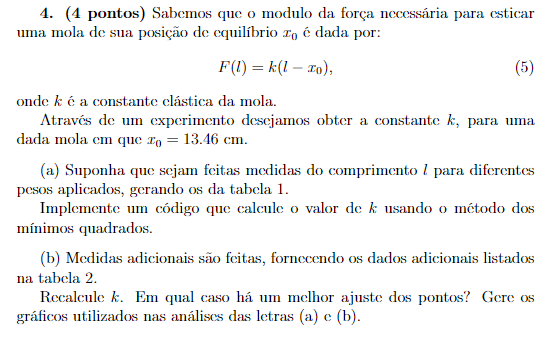

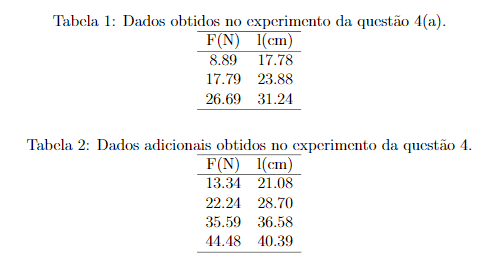

[[ 1.    1.    1.  ]
 [17.78 23.88 31.24]]
c0 = -14.251622271338306
c1 = 1.3185852786558976


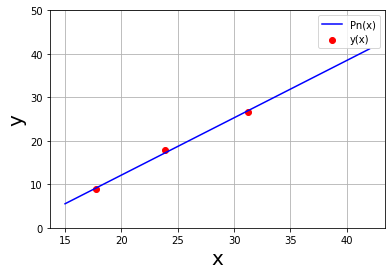

0.46139512869508237
[[ 1.    1.    1.    1.  ]
 [21.08 28.7  36.58 40.39]]
c0 = -21.713321499708655
c1 = 1.59765906113479


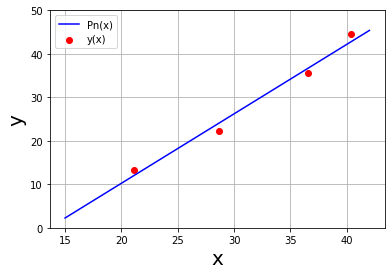

6.795217194411448


In [5]:
def elim_gauss(a, b):
    # algoritmo para a eliminação de Gauss para um sistema linear
    for k in range(len(a)):
        for i in range(k + 1, len(a)):
            mlt = a[i][k] / a[k][k]
            for j in range(k, len(a)):
                a[i][j] -= mlt * a[k][j]
            b[i] -= mlt * b[k]
    a_b = {"A": a,
           "B": b
           }
    return a_b


def get_x(a, b):
    """Retorna os valores de x de um sistema.
    ***Lembrando que essa função só recebe matrizes triangulares***"""
    x = np.zeros(len(b))
    # Criar os valores de xn
    n = len(b) - 1
    x[n] = b[n]/a[n][n]
    for i in range(n, -1, -1):
        sm = 0
        j = i+1
        if j < 2:
            sm += a[i][j]*x[j]
            x[i] = (1/a[i][i])*(b[i] - sm)
    return x


def minimos_quadrados(X, Y):
    """Seja uma função contínua ou só baseada em pontos,
    baseado no grau da função retorna os valores do ajuste linear."""
    # pontos = int(input("Quantidade de pontos usados no ajustes."))
    pontos = len(X)
    grau = 1

    H = np.zeros((grau+1, pontos))
    for i in range(len(H)):    # Acessar as linhas de H
        for j in range(len(H[0])):   # Acessar as colunas de H
            H[i][j] = pow(X[j], i)   # Eleva X para ter o número de graus da função
    print(H)
    # Montar o sistema A*x = B para descobrir as constantes (c) e achar o ajuste linear
    # Onde A é a matriz de [H], x são as constantes a serem encontradas e B o valor de Y
    # que o usuário passou.
    a = np.zeros((grau+1, grau+1))      # Como a é a matriz equivalente aos valores de h,
    # ela é uma matriz quadrada cujo os valores correspondem a H[i][j]
    b = np.zeros(grau+1)
    for i in range(len(a)):
        for j in range(len(a)):  # Matriz quadrada
            a[i][j] = H[i].dot(H[j])  # Produto interno dos vetores H ---> H0*H0, H0*H1, ... H[i]*H[j]
            # numa matriz de i linhas e j colunas.
            b[i] = H[i].dot(Y)

    # x = np.linalg.solve(a, b)
    a_b = elim_gauss(a, b)
    a = a_b["A"]
    b = a_b["B"]
    x = get_x(a, b)
    for i in range(len(x)):
        print(f"c{i} = {x[i]}")


def plota_grafico(x, y, c0, c1):
    x_1 = np.linspace(15, 42)
    y_1 = (c1*(x_1))+c0
    y_2 = y

    fig, ax = plt.subplots()
    ax.plot(x_1, y_1, color="blue", label="Pn(x)")
    ax.scatter(x, y_2, color="red", label="y(x)")
    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel("y", fontsize=20)
    ax.set_ylim(0, 50)
    ax.legend()

    plt.grid()
    plt.show()


x0 = 13.46
x_a = [17.78, 23.88, 31.24]
y_a = [8.89, 17.79, 26.69]

minimos_quadrados(x_a, y_a)
c0_a = -14.251622271338325
c1_a = 1.3185852786558983

plota_grafico(x_a, y_a, c0_a, c1_a)


def phi(x, c0, c1):
    phi = (c1*(x)) + c0
    return phi


# determinando a precisão a partir desses valores
d = 0
for k in range(len(x_a)):
    d += (y_a[k] - phi(x_a[k], c0_a, c1_a))**2

print(d)
# d_a = 0.46139512869508237

x_b = [21.08, 28.70, 36.58, 40.39]
y_b = [13.34, 22.24, 35.59, 44.48]
minimos_quadrados(x_b, y_b)
c0_b = -21.713321499708712
c1_b = 1.5976590611347916
plota_grafico(x_b, y_b, c0_b, c1_b)


# Descobrindo o valor do erro da função
d = 0
for k in range(len(x_a)):
    d += (y_b[k] - phi(x_b[k], c0_b, c1_b))**2
print(d)
# D_b = 6.795217194411448


# Conclusão: os dados da tabela (a) nos deram um resultado mais preciso
# do que os dados da tabela (b).

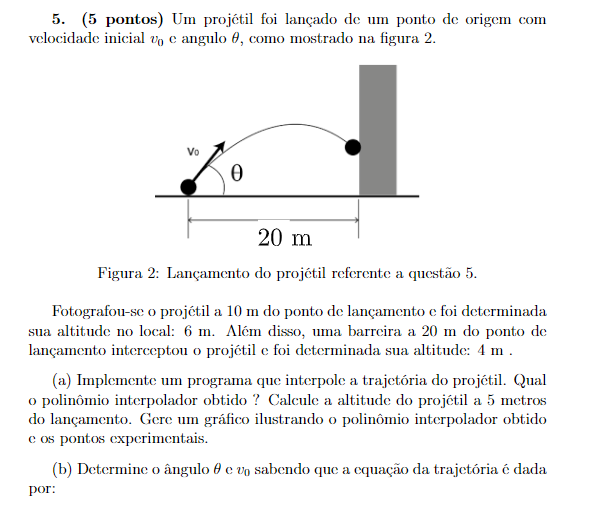

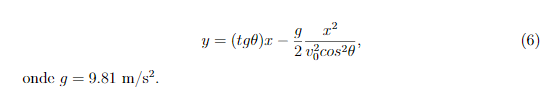

[ 0.    1.   -0.04]


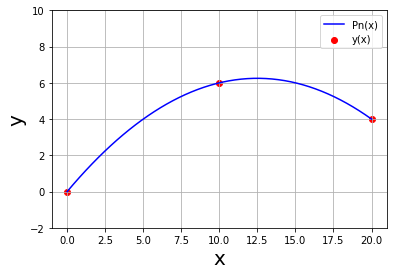

4.0
15.660459763365827


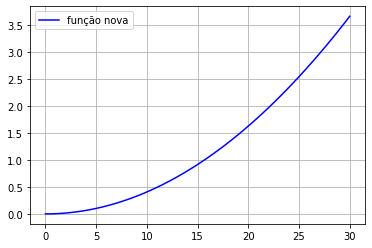

Iteração 1
v0=  15.375 fx=  0.9638761467889909 b-a 0.25
Iteração 2
v0=  15.4375 fx=  0.9717284658511725 b-a 0.125
Iteração 3
v0=  15.46875 fx=  0.9756665711009176 b-a 0.0625
Iteração 4
v0=  15.484375 fx=  0.9776386101554537 b-a 0.03125
Iteração 5
v0=  15.4921875 fx=  0.9786253762901377 b-a 0.015625
Iteração 6
v0=  15.49609375 fx=  0.9791189460093338 b-a 0.0078125
Iteração 7
v0=  15.498046875 fx=  0.9793657775318952 b-a 0.00390625
Iteração 8
v0=  15.4990234375 fx=  0.9794892049589169 b-a 0.001953125
Iteração 9
v0=  15.49951171875 fx=  0.9795509215888628 b-a 0.0009765625
Iteração 10
v0=  15.499755859375 fx=  0.9795817806329445 b-a 0.00048828125
Iteração 11
v0=  15.4998779296875 fx=  0.9795972103372628 b-a 0.000244140625
Iteração 12
v0=  15.49993896484375 fx=  0.9796049252349911 b-a 0.0001220703125
Iteração 13
v0=  15.499969482421875 fx=  0.9796087826952476 b-a 6.103515625e-05
Iteração 14
v0=  15.499984741210938 fx=  0.979610711428224 b-a 3.0517578125e-05
Iteração 15
v0=  15.4999923706054

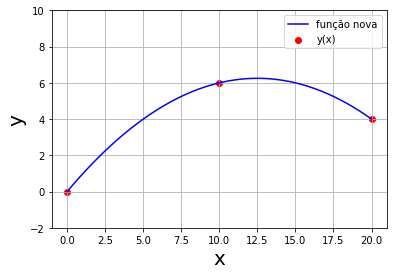

In [6]:
def interpolaçao_polinomial(x, y):
    """Função que faz a interpolação polinomial de x e y,
     achando os coeficientes (a) tal que xn*an = yn para qualquer n."""
    qtd_pontos = len(x)
    matriz_x = np.zeros((qtd_pontos, qtd_pontos))
    matriz_y = np.array(y)
    # loop que preenche a matriz_x com os valores de xn para cada linha e aumenta seu expoente para cada coluna.
    for i in range(len(x)):
        for col in range(len(matriz_x)):
            matriz_x[i][col] = pow(x[i], col)
    # Achamos o valor de a, que multiplicado a xx nos retorna o valor de y.
    a = np.linalg.solve(matriz_x, matriz_y)
    return a


def get_pn(x, a):
    """Função que acha o valor do polinômio (Pn) para um dado valor de x e de seus coeficientes (an). """
    pn = 0
    # Aqui criamos o polinômio pn, que nos retorna o valor de y para qualquer ponto da função. Ex: X[0]
    for i in range(len(a)):
        pn += a[i] * (pow(x, i))  # Retorna o valor de y = y[0], exatamente como o esperado.
    return pn

# TODO 4: Função que retorna um gráfico comparando os pontos dados f(x)
#  com a função contínua adquirida através da interpolação.


def plota_grafico(x, y, a):
    x_1 = np.linspace(0, 20)
    y_1 = get_pn(x_1, a)

    y_2 = y

    fig, ax = plt.subplots()
    ax.plot(x_1, y_1, color="blue", label="Pn(x)")
    ax.scatter(x, y_2, color="red", label="y(x)")
    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel("y", fontsize=20)
    ax.set_ylim(-2, 10)
    ax.legend()

    plt.grid()
    plt.show()


# TODO: Questão 5, letra (a):
# Dados da trajetória do projétil
X = [0, 10, 20]
Y = [0, 6, 4]
# Seu usarmos o método de lagrange, podemos determinar o valor de y para x = 5 metros
distancia = [5]
a = interpolaçao_polinomial(X,Y)   # VALOR DE y = 4.0 PARA x = 5
print(a)        # a1 = 1, a2= -0.04 ---> x - 0.04*x^2 = y
plota_grafico(X, Y, a)
print(get_pn(5, a))
# TODO: Questão 5, letra (b):
# Levando em consideração as seguintes afirmações:

# x - 0.04*x^2 = (np.tan(theta) * x) - ((9.81 / 2) * (x ** 2) / ((v0 ** 2) * ((np.cos(theta)) ** 2)))

# --->                                  x - 0.04*x^2
# ---> ------------------------------------------------------------------------------------ = 0
# ---> (np.tan(theta) * x) - ((9.81 / 2) * (x ** 2) / ((v0 ** 2) * ((np.cos(theta)) ** 2)))

# Sendo assim, temos que os termos de mesmo grau são equivalentes
# Tal que x = (np.tan(theta) * x) como termo de primeiro grau,
# Com isso, podemos cancelar os termos (x) e temos que np.tan(theta) = 1, sendo então o ângulo theta = 45º
theta = np.radians(45)
# Para os termos de segundo grau --> -0.04*x^2 = - ((9.81 / 2) * (x ** 2) / ((v0 ** 2) * ((np.cos(theta)) ** 2)))
# ---> 0.04*x^2 / ((9.81 / 2) * (x ** 2) / ((v0 ** 2) * ((np.cos(theta)) ** 2))) = 0
# ---> cancelando os termos de x e isolando v0, podemos encontrá-lo.
v0 = np.sqrt(9.81/ 0.04*2*((np.cos(theta))**2))
print(v0)
# v0 = 15.660459763365827, theta = 45º
# Poderiamos também usar o método da bissecção para encontrar o valor de v0
# em que y = 1, assim as afirmações acima também se satisfazem:
y = (0.04*2*((np.cos(theta))**2)/9.81) * v0**2
# Plotando o gráfico dessa função podemos encontrar um ponto x0, em que y se aproxima de 1:
v_0 = np.linspace(0, 30)
y0 = ((0.04*2*((np.cos(theta))**2)*v_0**2)/9.81)
plt.plot(v_0, y0, color="blue", label="função nova")
plt.legend()
plt.grid()
plt.show()


# Vemos que o valor de v0 para y = 1 é próximo de 15, então vamos implementar o método:
# Algoritmo
def f(v0):  # Definindo a função
    y = ((0.04*2*((np.cos(theta))**2)*v0**2)/9.81)
    return y


# Valores iniciais
a = 15      # Valores de a e b próximos a primeira raíz segundo o gráfico.
b = 15.5
x0 = (b + a) / 2
eps = 10 ** (-6)
# Iniciando o algoritmo da bissecção
it = 0
x = x0
while np.abs(b - a) > eps:
    it = it + 1

    if f(x) > 1:
        b = x
        x = (a + b) / 2

    if f(x) < 1:
        a = x
        x = (a + b) / 2

    print('Iteração', it)
    print('v0= ', x, 'fx= ', f(x), 'b-a', np.abs(b - a))

# Chegamos ao valor de v0 = 15.499999523162842


# Plotando o gráfico para confirmar os valores
x_1 = np.linspace(0, 20)
y_1 = (np.tan(theta) * x_1) - ((9.81 / 2) * (x_1 ** 2) / ((v0 ** 2) * ((np.cos(theta)) ** 2)))

y_2 = Y

fig, ax = plt.subplots()
ax.plot(x_1, y_1, color="blue", label="função nova")
ax.scatter(X, y_2, color="red", label="y(x)")
ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("y", fontsize=20)
ax.set_ylim(-2, 10)
ax.legend()

plt.grid()
plt.show()

# Os dados batem.